In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

Saving x.csv to x.csv


In [0]:
import io

In [0]:
X = pd.read_csv(io.BytesIO(uploaded['x.csv']))

In [0]:
Y = X['worldwide_gross']

In [0]:
X = X.drop('worldwide_gross', axis=1)

In [0]:
from sklearn.linear_model import Lasso

model = Lasso()

In [0]:
X = X.drop('gross', axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [0]:
X_train

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
3685,1800000.0,2000.0,1.85,109.0,2187.0,1800000.0,7.3
4065,70000.0,2014.0,1.85,82.0,11642.0,70000.0,5.6
2028,20000000.0,2012.0,2.35,95.0,1414.0,20000000.0,6.1
1909,21000000.0,1993.0,1.85,96.0,1254.0,17000000.0,4.8
1241,37000000.0,2015.0,1.85,105.0,44037.0,37000000.0,5.4
...,...,...,...,...,...,...,...
2409,15000000.0,2008.0,2.35,111.0,1252.0,15000000.0,6.7
3837,1000000.0,2003.0,1.85,79.0,2489.0,1000000.0,6.1
2262,16000000.0,2006.0,1.85,83.0,26402.0,16000000.0,5.9
3117,6400000.0,2009.0,1.85,98.0,1163.0,10000000.0,7.6


In [0]:
len(X_train)/len(X)

0.75

In [0]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.559285030554145e+18, tolerance: 9746139335640308.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
model.score(X_test, Y_test)

0.5408031788558493

In [0]:
model.coef_

array([ 3.20978278e+00, -1.80722296e+05, -6.07012110e+06,  5.85621553e+04,
        2.15945688e+02, -6.00320782e-02,  2.58920048e+07])

In [0]:
var = np.floor(np.log10(np.abs(model.coef_)))

([<matplotlib.axis.XTick at 0x7fb9206ee128>,
 [Text(0, 0, 'production_budget'),
  Text(0, 0, 'title_year'),
  Text(0, 0, 'aspect_ratio'),
  Text(0, 0, 'duration.1'),
  Text(0, 0, 'cast_total_facebook_likes'),
  Text(0, 0, 'budget'),
  Text(0, 0, 'imdb_score')])

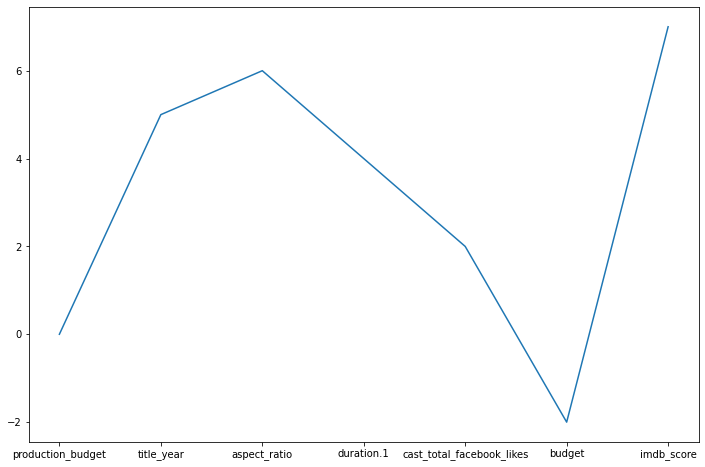

In [0]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns))

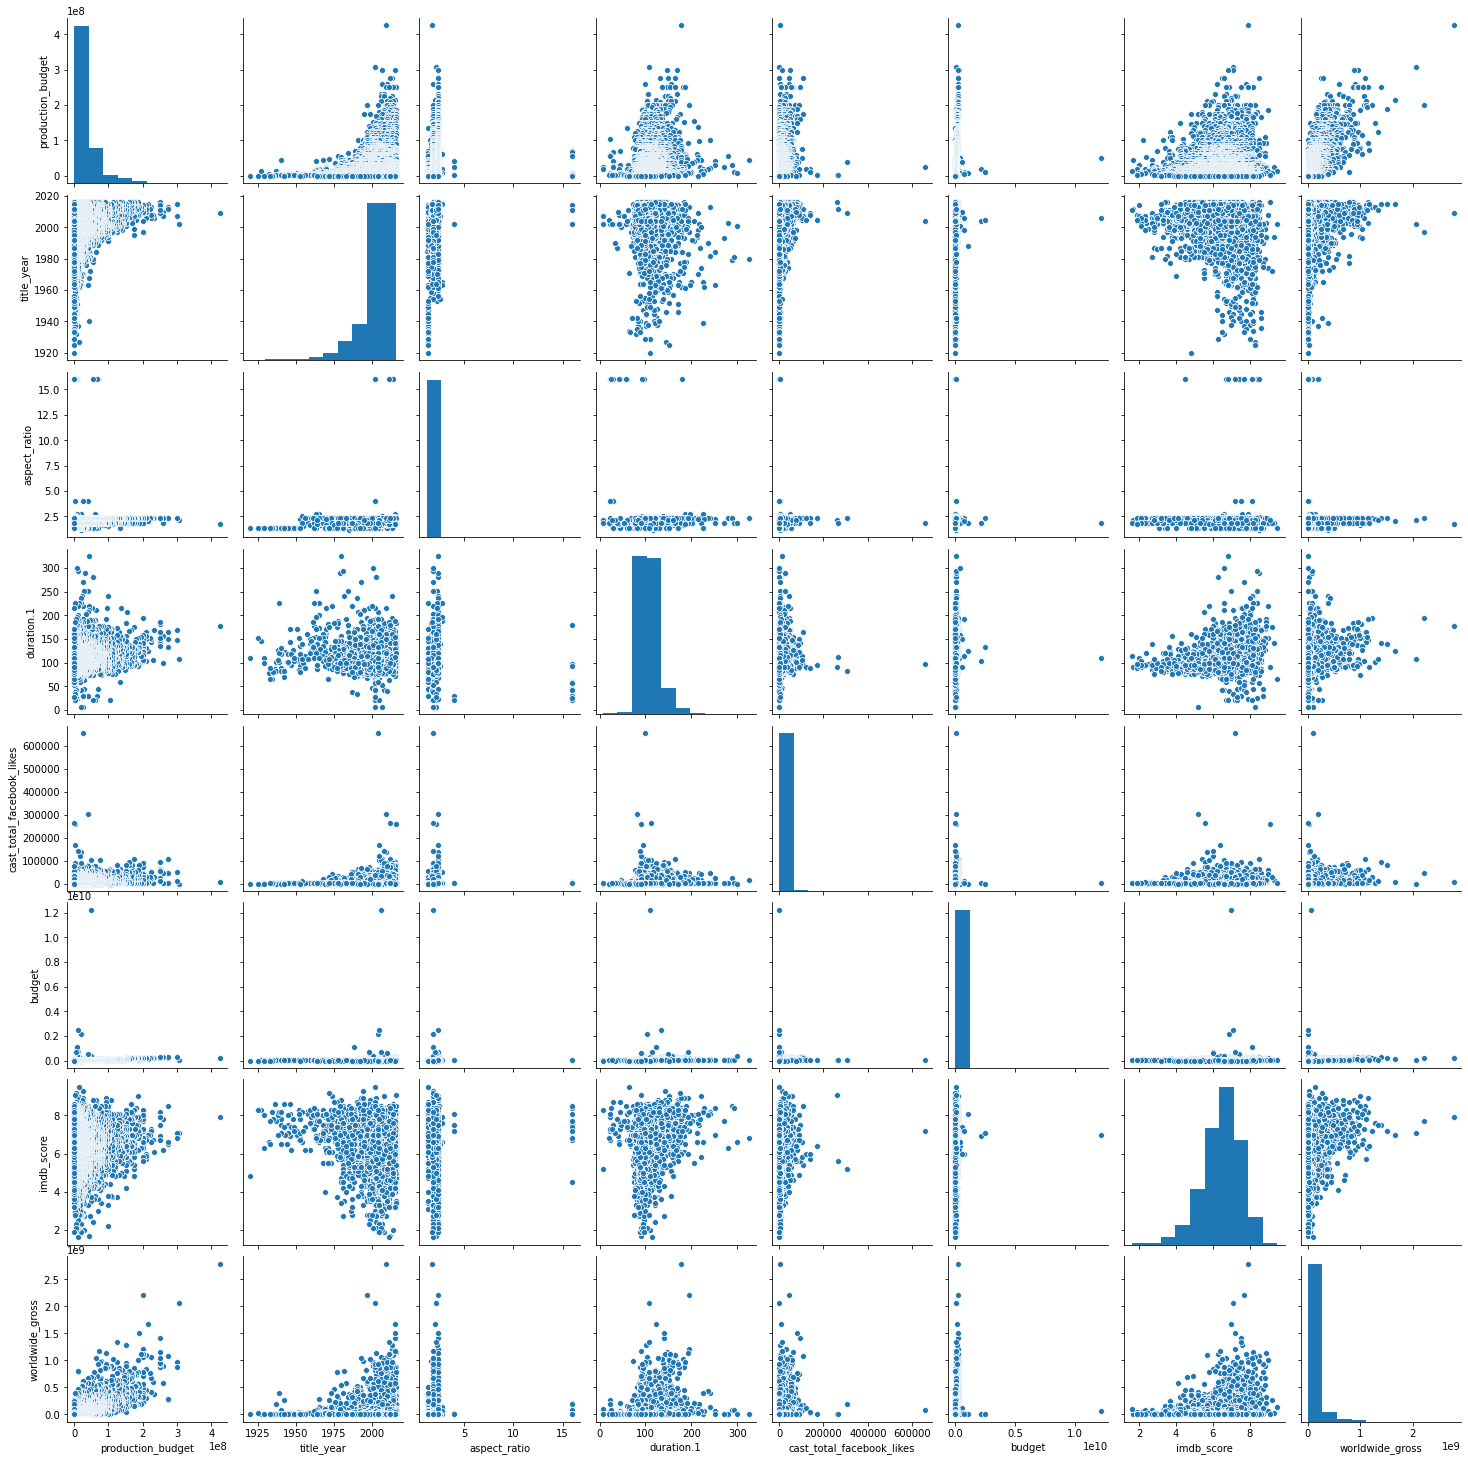

In [0]:
import seaborn as sns
Z = pd.concat([X, Y], axis=1)
sns.pairplot(Z)

In [0]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
z2 = pd.concat([X, clase], axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

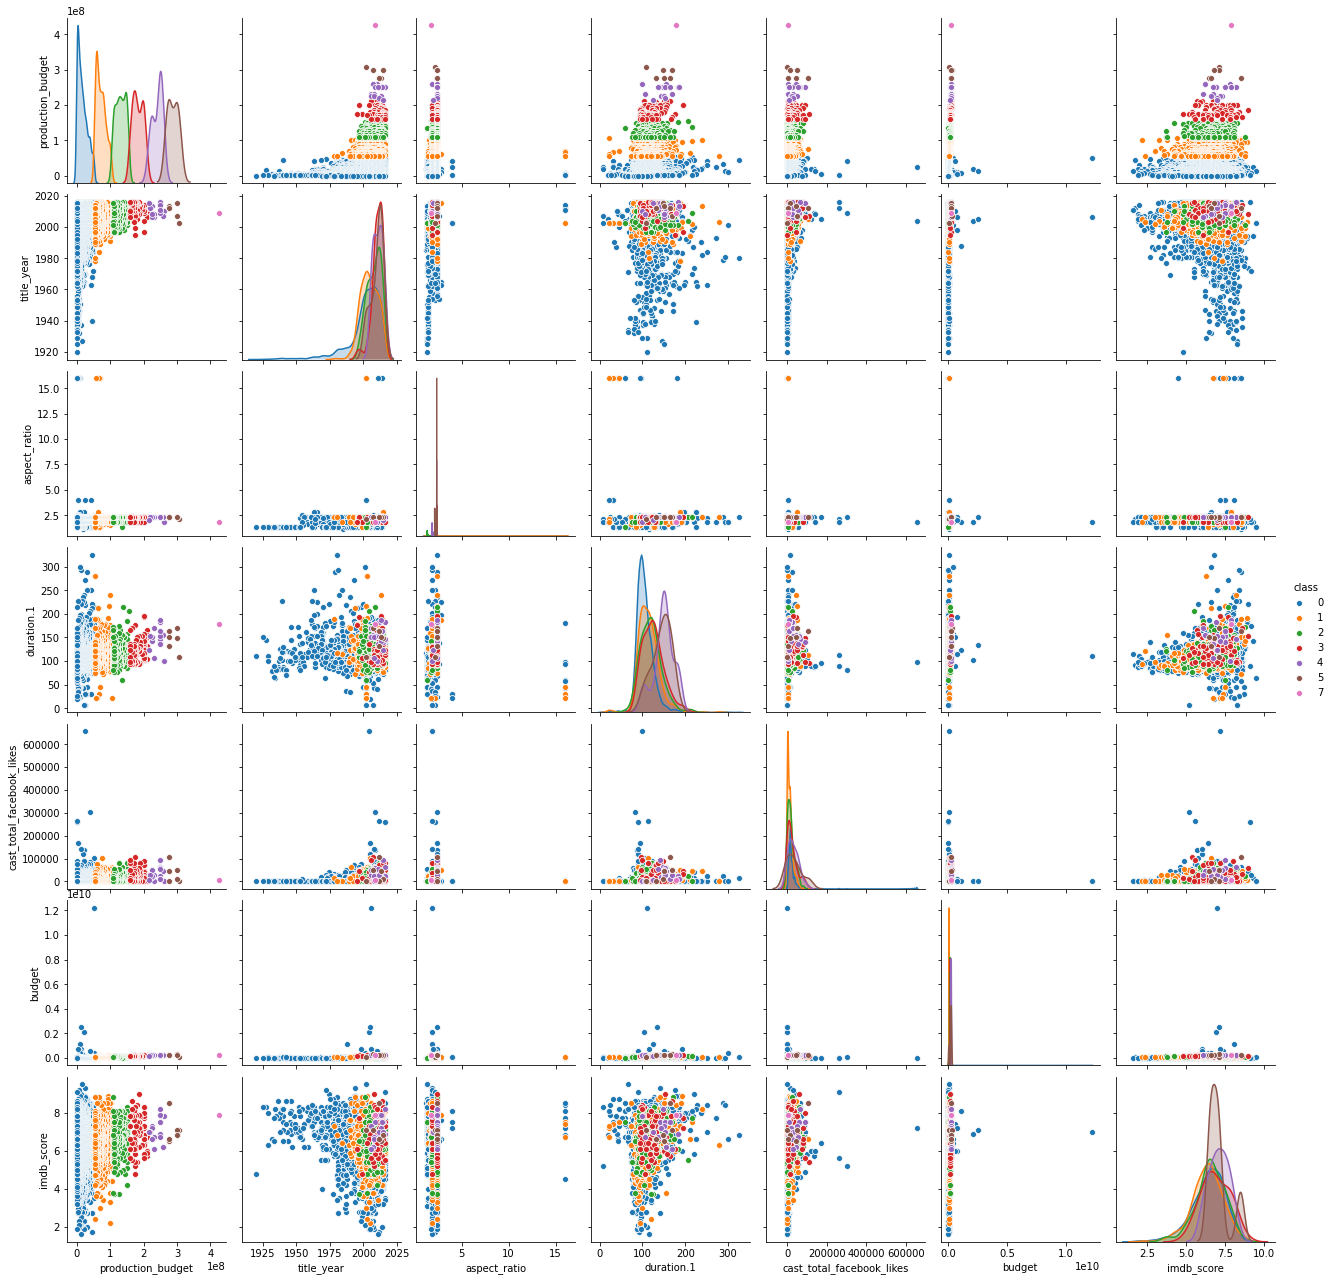

In [0]:
sns.pairplot(z2, hue='class')

In [0]:
Z3 = pd.concat([X,Y], axis=1)

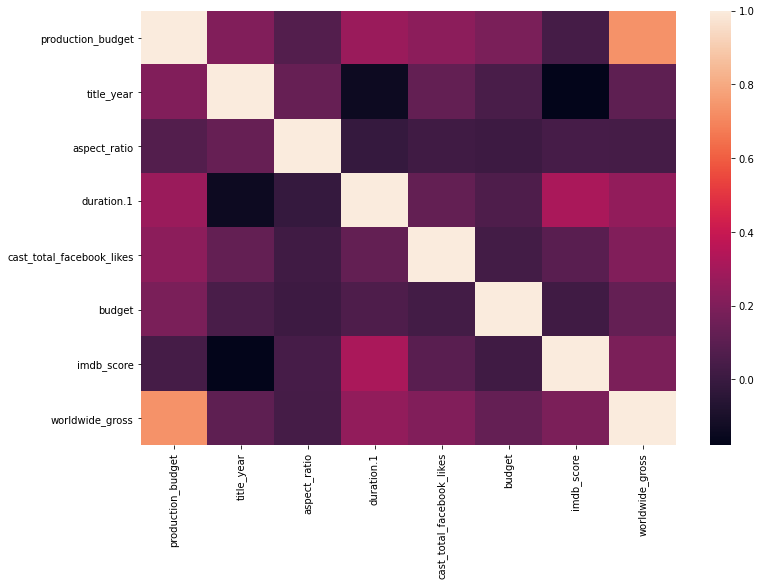

In [0]:
sns.heatmap(Z3.corr())

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X, Y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7fb91b533620>)

([<matplotlib.axis.XTick at 0x7fb91b1da668>,
 [Text(0, 0, 'production_budget'),
  Text(0, 0, 'title_year'),
  Text(0, 0, 'aspect_ratio'),
  Text(0, 0, 'duration.1'),
  Text(0, 0, 'cast_total_facebook_likes'),
  Text(0, 0, 'budget'),
  Text(0, 0, 'imdb_score')])

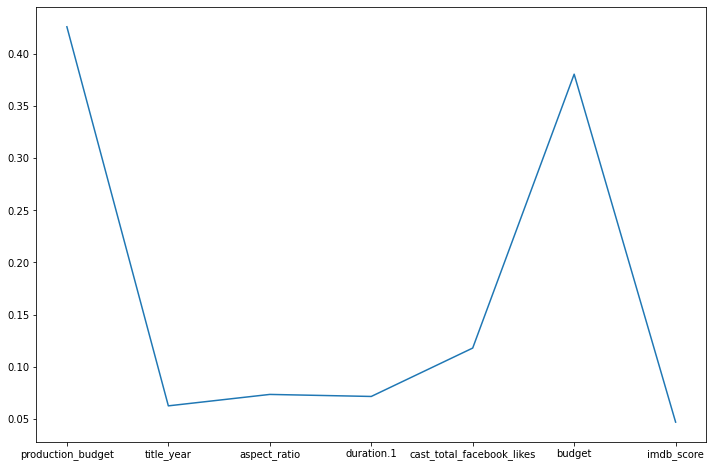

In [0]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7), list(X.columns))

In [0]:
X2 = X[['production_budget', 'title_year', 'duration.1', 'cast_total_facebook_likes', 'imdb_score']]
X3 = X[['production_budget', 'cast_total_facebook_likes', 'imdb_score']]

In [0]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y)

In [0]:
cols2 = ['production_budget', 'title_year', 'duration.1', 'cast_total_facebook_likes', 'imdb_score']
X2_train, X2_test, Y2_train, Y2_test = X_train[cols2], X_test[cols2], Y_train, Y_test

In [0]:
cols3 = ['production_budget', 'cast_total_facebook_likes', 'imdb_score']
X3_train, X3_test, Y3_train, Y3_test = X_train[cols3], X_test[cols3], Y_train, Y_test

In [0]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train, Y_train)
model2.fit(X2_train, Y2_train)
model3.fit(X3_train, Y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
print(model.score(X_test, Y_test))
print(model2.score(X2_test, Y2_test))
print(model3.score(X3_test, Y3_test))

0.5148999831457693
0.5110025038348016
0.5139868185071739
